In [2]:
import pandas as pd
import datetime
import csv
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [3]:
fi1 = 'subway_swipe/turnstile_'
fi2 = '170128'   #for plot title
fil = fi1 +fi2 +'.txt'

In [30]:
with open(fil, "rb") as f:
    reader = csv.reader(f)
    header = reader.next()
    #rest = [row for row in reader]


In [34]:
header[-1] = header[-1].strip(' ')

In [41]:
inputFileName = fil
outputFileName = fi1 + fi2 + "_modified.txt"

with open(inputFileName, 'rb') as inFile, open(outputFileName, 'wb') as outfile:
    r = csv.reader(inFile)
    w = csv.writer(outfile)
    
    header = r.next()
    header[-1] = header[-1].strip(' ')
    w.writerow(header)

    # copy the rest
    for row in r:
        w.writerow(row)

In [35]:
def get_entries_count(fil):


    df = pd.DataFrame.from_csv(fil)
    df['date_time'] = df['DATE']+'-'+ df['TIME']
    str_to_time = lambda x: datetime.datetime.strptime(x, "%m/%d/%Y-%H:%M:%S")
    df['date_time'] = map(str_to_time,df['date_time'])
    df1 = df.set_index(keys="date_time",drop=False)


    #calculate entries and exits
    with open(fil,'r')as fi:
        reader = csv.DictReader(fi)
        for row in reader:
            a = int(row['ENTRIES'])
            c = int(row['EXITS'])
            break


    entries = []
    exits = []
    hour = []
    with open(fil,'r')as fi:
        reader = csv.DictReader(fi)
        for row in reader:
            hour.append(int(row['TIME'][0:2]))
            b = int(row['ENTRIES'])
            d = int(row['EXITS'])
            entries.append(b-a)
            exits.append(d-c)
            a = b
            c = d
        
    df1.ENTRIES = entries
    df1.EXITS = exits
    df1['hour']=hour

    del df1['DATE']
    del df1['TIME']

    rush_am = lambda x: x.weekday()
    df1["weekday"] = df1["date_time"].apply(rush_am)

    df1 = df1[df1.hour == 11 ]
    df1 = df1[df1.weekday != 0]
    df1 = df1[df1.weekday != 6]

    df1 = df1.reset_index(drop = True)
    return df1

In [53]:
df1 = get_entries_count(outputFileName)

In [45]:
df2 =get_entries_count("subway_swipe/MTA_swipe_170204.txt")

In [46]:
len(df1),len(df2)

(12550, 12570)

In [50]:
pd.concat([df1,df2])

34 ST-PENN STA 44408
34 ST-HERALD SQ 23145
59 ST 12490
TIMES SQ-42 ST 11579
ATL AV-BARCLAY 14543
23 ST 12695
86 ST 21980
42 ST-PORT AUTH 23895
GRD CNTRL-42 ST 17721
CHURCH AV 11906
FLUSHING-MAIN 22054
JAMAICA 179 ST 10119
JKSN HT-ROOSVLT 17533
JAMAICA CENTER 12938
125 ST 10160
145 ST 13557
CROWN HTS-UTICA 13717
BEDFORD AV 10525


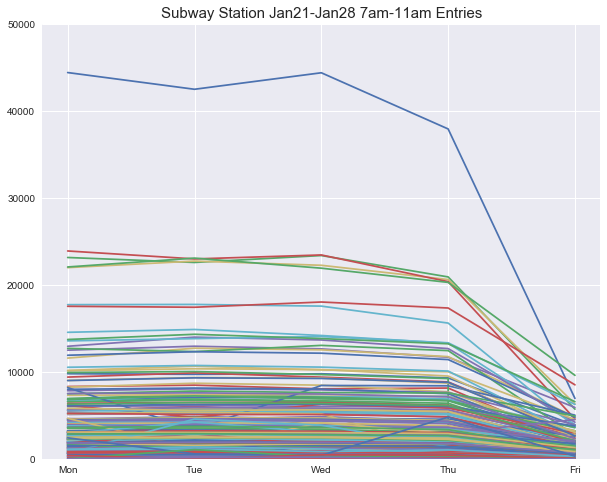

In [55]:
subway_station = df1['STATION'].value_counts().keys()
significant_st={}
plt.figure(figsize=(10,8))
for i in subway_station:
    df_local = df1[df1.STATION == i].reset_index(drop = True)   
    #just select the part of df about the station we are looking at
    
    weekday={}
    for j in range(1,6):
        weekday[j] = df_local[df_local.weekday == j]['ENTRIES'].sum()
    if weekday[1] >80000:
        #significant_st[i]=weekday[1]
        continue
    if weekday[1] >10000:
        significant_st[i]=weekday[1]
        print i ,weekday[1]
    plt.plot(range(1,6),weekday.values())
    labels = ['Mon','Tue','Wed','Thu','Fri']
    plt.ylim(0,50000)
    plt.xticks([1,2,3,4,5], labels)
    plt.title('Subway Station Jan21-Jan28 7am-11am Entries',fontsize =15)
   